In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import numpy as np
from PIL import Image
%matplotlib inline

In [86]:
# stop file from http://members.unine.ch/jacques.savoy/clef/
stopfile = 'englishST.txt'
textfilepath = 'microsoft2023.txt'
mask_img = 'microsoft-logo-mask.png'
savefig = False
figname = 'microsoft-word-cloud.png'

In [87]:
def cleanup(text):
    text = text.lower()
    clean_text = re.sub(r'[^\w\s]', '', text)
    return clean_text

def createWordCount(text,stop_words):
    # need to remove all punctuation from the string. Also make all words lowercase. remove stop words
    word_counts = Counter(text.split())
    word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}
    return word_counts

def load_words_from_file(path_to_file):
    # outputs the text as a list
    sw_list = []
    with open(path_to_file, 'r', encoding="utf8") as f:
        [sw_list.append(word) for line in f for word in line.split()]
    return sw_list

def load_words_as_string(path_to_file):
    with open(path_to_file, 'r', encoding="utf8") as f:
        text = f.read()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    return text

In [88]:
stop_words = load_words_from_file(stopfile)
stop_words = [cleanup(word) for word in stop_words]

In [89]:
text = load_words_as_string(textfilepath)
text = cleanup(text)
word_counts = createWordCount(text,stop_words)

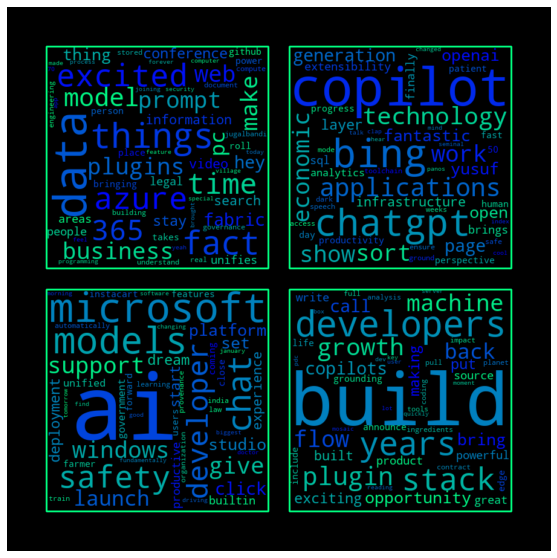

In [90]:
# Generate the word cloud

mask = np.array(Image.open(mask_img))

wordcloud = WordCloud(colormap="winter",mask=mask,background_color="black",contour_width=2, contour_color='#00ff80').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
if savefig:
    plt.savefig(figname,format='png',bbox_inches = 'tight')
plt.show()